<a href="https://colab.research.google.com/github/Shahsawar51/MY_DATA_SCIENCE_JOURNEY/blob/main/wk25_Multicollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:


# Set seed for reproducibility
np.random.seed(42)

# Generate features
size = np.random.normal(1500, 300, 1000)  # House size in sq ft
bedrooms = (size // 300) + np.random.randint(-1, 2, 1000)  # Correlated with size
bathrooms = (bedrooms / 2) + np.random.uniform(-0.5, 1, 1000)  # Slightly correlated with bedrooms
year_built = np.random.randint(1950, 2023, 1000)  # Random years
location_score = np.random.randint(1, 11, 1000)  # Location score (1-10)

# Generate target variable (Price) with some noise
price = (size * 150) + (bedrooms * 10000) + (bathrooms * 5000) + (location_score * 2000) + np.random.normal(0, 10000, 1000)

# Create DataFrame
df = pd.DataFrame({
    'Size (sq ft)': size,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Year Built': year_built,
    'Location Score': location_score,
    'Price': price
})

# Save to CSV
df.to_csv("multicollinearity_dataset.csv", index=False)

# Display first few rows
df


,Size (sq ft),Bedrooms,Bathrooms,Year Built,Location Score,Price
0,1649.014246,6.0,2.536288,2016,2,333364.855838
1,1458.520710,3.0,2.247546,1964,2,261788.627267
2,1694.306561,6.0,2.909606,1981,4,347345.734946
3,1956.908957,5.0,2.777118,2017,1,373948.101740
4,1429.753988,5.0,2.448088,1967,9,285540.330749
...,...,...,...,...,...,...
995,1415.669912,4.0,2.551755,1954,1,272378.240019
996,2039.305958,6.0,3.590585,1969,8,397940.097225
997,1692.252858,6.0,3.343109,1955,4,336571.517951
998,1328.646303,3.0,2.420636,2019,7,260501.700152


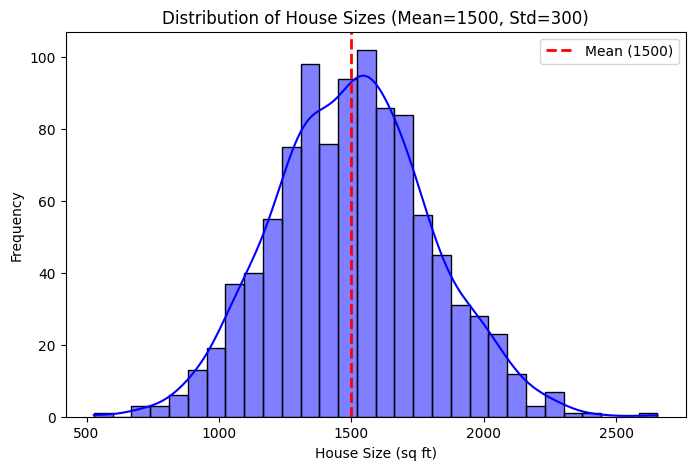

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(size, bins=30, kde=True, color="blue", edgecolor="black")
plt.axvline(1500, color='red', linestyle='dashed', linewidth=2, label="Mean (1500)")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Frequency")
plt.title("Distribution of House Sizes (Mean=1500, Std=300)")
plt.legend()
plt.show()

In [ ]:
X = df[['Size (sq ft)', 'Bedrooms', 'Bathrooms', 'Location Score']]  # Features
y = df['Price']  # Target Variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(800, 4)

In [ ]:
y_test.shape

(200,)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 151.2432675 , 9891.32727688, 5291.31542767, 1826.54581631])

In [ ]:
model.intercept_

np.float64(-1828.7191915204166)

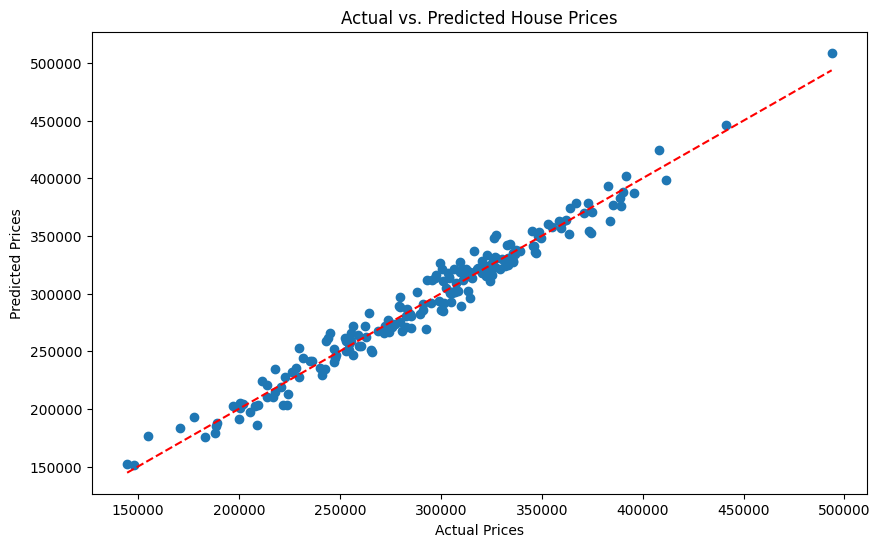

In [ ]:

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()


In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')

R² Score: 0.9683
RMSE: 10210.89


In [ ]:
import statsmodels.api as sm

# Add constant term for intercept
X_train_sm = sm.add_constant(X_train)

# Fit OLS Model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     6801.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:20:12   Log-Likelihood:                -8491.8
No. Observations:                 800   AIC:                         1.699e+04
Df Residuals:                     795   BIC:                         1.702e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1828.7192   1966.550     -0.

In [ ]:
X = df.drop(columns=['Price'])  # Target variable ko remove karna zaroori hai

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          Feature        VIF
0    Size (sq ft)  62.508902
1        Bedrooms  58.754777
2       Bathrooms  36.303355
3      Year Built  31.826646
4  Location Score   4.964922


mean of residuals: -254.8296


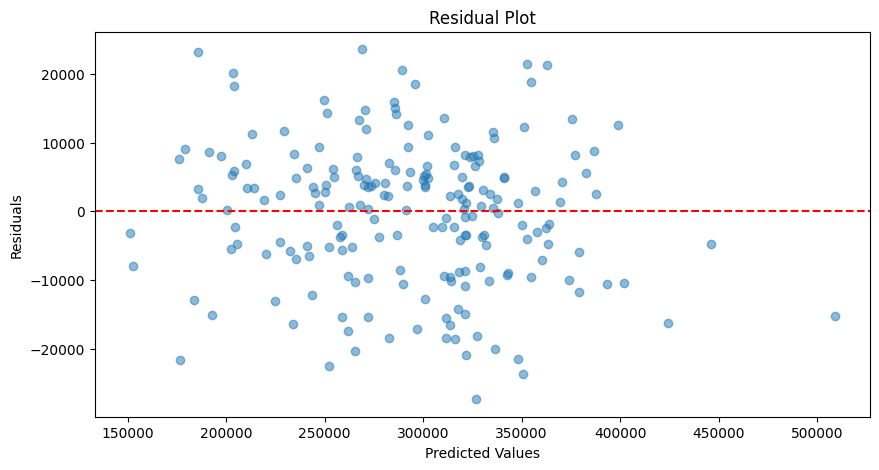

In [ ]:
residuals = y_test - y_pred

print(f"mean of residuals: {np.mean(residuals): .4f}")

# Step 2: Plot Residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

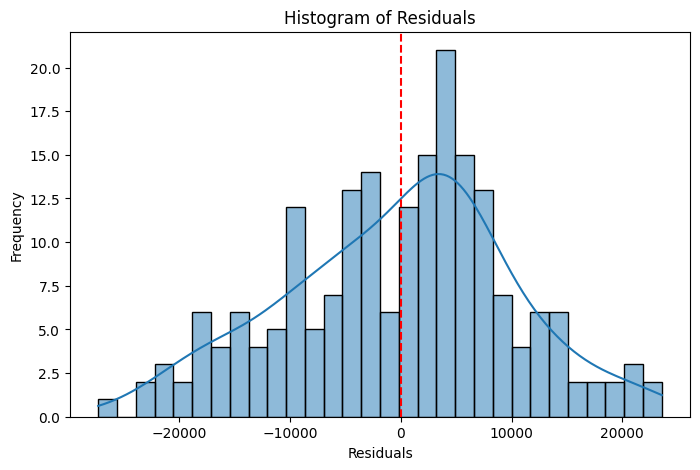

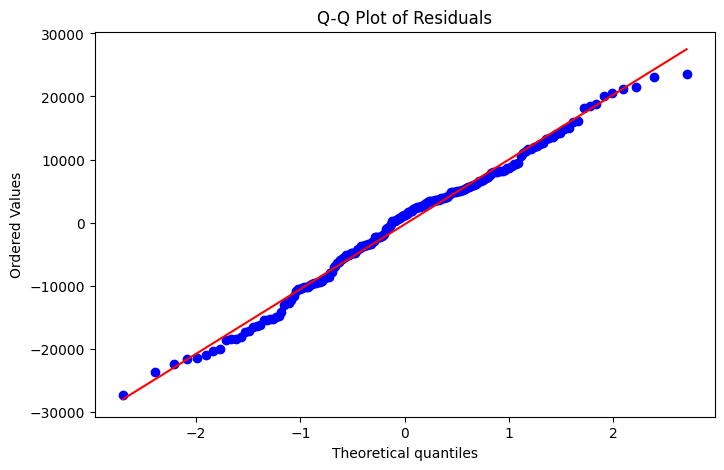

Shapiro-Wilk Test Statistic: 0.9889, p-value: 0.1249
Residuals appear normally distributed (p > 0.05)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred

# 1️⃣ Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Normality Test)
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")

# Interpretation
if shapiro_test.pvalue < 0.05:
    print("Residuals are NOT normally distributed (p < 0.05)")
else:
    print("Residuals appear normally distributed (p > 0.05)")
